In [10]:
import tensorflow as tf
import numpy as np
import cv2
%run "./config/notebook.ipynb"
%run "./config/local.ipynb"
%run "./config/values.ipynb"

## Loading data

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Displaying features

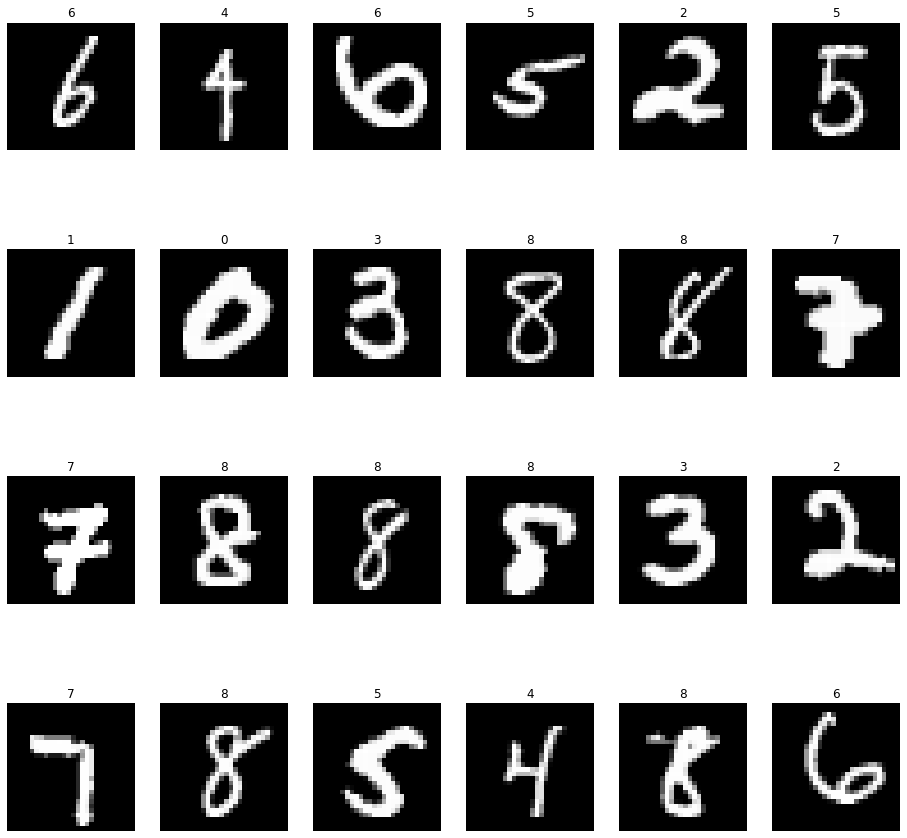

In [3]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
grid_size = (4,6)

plt.figure(figsize=(16,16))

indexes = np.random.choice(range(len(X_train)), size=grid_size[0]*grid_size[1], replace=False)

for i in range(grid_size[0]*grid_size[1]):
    plt.subplot(grid_size[0],grid_size[1],i+1)
    
    # idx = randint(0,len(X_train))
    idx = indexes[i]
    img = X_train[idx]
    # img = np.array(char).reshape(IMAGE_ORIGINAL_SIZE) 

    import matplotlib.pyplot as plt
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(y_train[idx])
    plt.axis('off')
    
plt.show()

## Set data generator

In [4]:
def generator(batch_size=20, target_size=(128,128), classname='vowel_diacritic'):
    while 1:
        # select indexes
        idxs = [i for i in range(len(X_train))]
        np.random.shuffle(idxs)
        idxs = idxs[:batch_size]
        
        data = np.zeros((batch_size, target_size[0], target_size[1], 1))
        labels = np.zeros((batch_size, len(np.unique(y_train))))
        # read the image
        for i in range(len(idxs)):
            img = X_train[idxs[i]]
            img = img.reshape(img.shape + (1,))            
            data[i] = img / 255.
            
            labels[i,y_train[idxs[i]]] = 1
        
        yield data, labels

train_generator = generator(target_size=(28,28))
validation_generator = generator(target_size=(28,28))

## Set model

In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(len(np.unique(y_train)), activation='softmax'))
model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), metrics=['acc'], loss='categorical_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total para

Using TensorFlow backend.


In [6]:
model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

IndentationError: unexpected indent (<ipython-input-6-759664c6b976>, line 2)

In [7]:
history = model.fit_generator(train_generator, 
                             steps_per_epoch=500,
                             epochs=40,
                             validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/40
500/500 [==============================] - 4s 9ms/step - loss: 1.0405 - acc: 0.7565 - val_loss: 0.3656 - val_acc: 0.8940
Epoch 2/40
500/500 [==============================] - 3s 6ms/step - loss: 0.3038 - acc: 0.9090 - val_loss: 0.2673 - val_acc: 0.9205
Epoch 3/40
500/500 [==============================] - 3s 6ms/step - loss: 0.2150 - acc: 0.9376 - val_loss: 0.1956 - val_acc: 0.9450
Epoch 4/40
500/500 [==============================] - 3s 6ms/step - loss: 0.1695 - acc: 0.9513 - val_loss: 0.1771 - val_acc: 0.9465
Epoch 5/40
500/500 [==============================] - 3s 6ms/step - loss: 0.1406 - acc: 0.9583 - val_loss: 0.1224 - val_acc: 0.9630
Epoch 6/40
500/500 [==============================] - 3s 6ms/step - loss: 0.1269 - acc: 0.9632 - val_loss: 0.1038 - val_acc: 0.9690
Epoch 7/40
500/500 [==============================] - 3s 6ms/step - loss: 0.1193 - acc: 0.9645 - val_loss: 0.1110 - val_acc: 0.9660
Epoch 8/40
500/500 [==============================] - 3s 6ms/step - loss: 0.

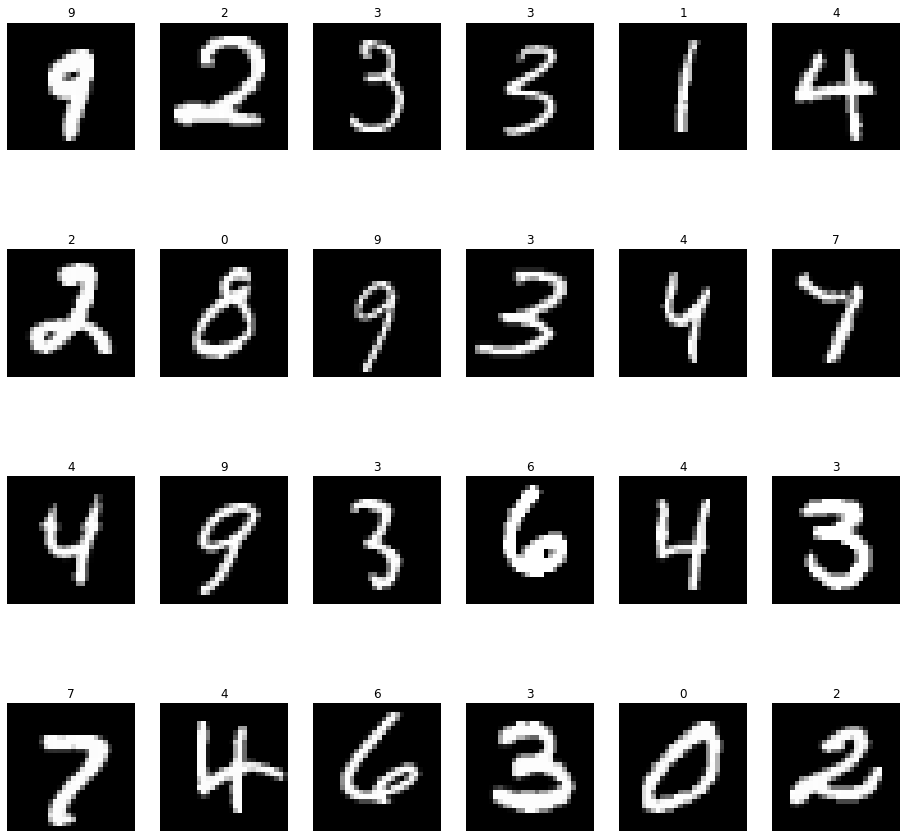

In [8]:
import random

def random_image():
    idx = random.randint(0,len(X_test)-1)
    img = X_test[idx]    
    return img

grid_size = (4,6)

plt.figure(figsize=(16,16))

indexes = np.random.choice(range(len(X_train)), size=grid_size[0]*grid_size[1], replace=False)

for i in range(grid_size[0]*grid_size[1]):
    plt.subplot(grid_size[0],grid_size[1],i+1)
        
    img = random_image()
    predicted_class = model.predict_classes(img.reshape((1,) + img.shape + (1,)))

    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(predicted_class[0])
    plt.axis('off')
    
plt.show()


## Test on real data

In [49]:
img_path = os.path.join("/media/laurent/backup/data/handwritting/images", "clo_1.png")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28), interpolation = cv2.INTER_NEAREST)

edges = cv2.Canny(img,28,28)
enhanced_img = cv2.equalizeHist(img)
binimg = img
cv2.bilateralFilter(binimg, 9, 90,16)
binimg = cv2.GaussianBlur(binimg,(5,5),0)
#binImg = np.zeros((img.shape[0], img.shape[1]), np.uint8)   
binimg = cv2.adaptiveThreshold(binimg, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 55, -3)

img = img / 255
edges = edges / 255
enhanced_img = enhanced_img / 255



In [45]:
img_path = os.path.join("/media/laurent/backup/data/handwritting/images", "clo_1.png")
binimg = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
cv2.bilateralFilter(binimg, 9, 90,16)
binimg = cv2.GaussianBlur(binimg,(5,5),0)
#binImg = np.zeros((img.shape[0], img.shape[1]), np.uint8)   
binimg = cv2.adaptiveThreshold(binimg, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 55, -3)
#cv2.bilateralFilter(binImg, 9, 90,16)
#binImg = cv2.GaussianBlur(binImg, (3,3), 0)
#
print(binimg.shape)

(207, 261)


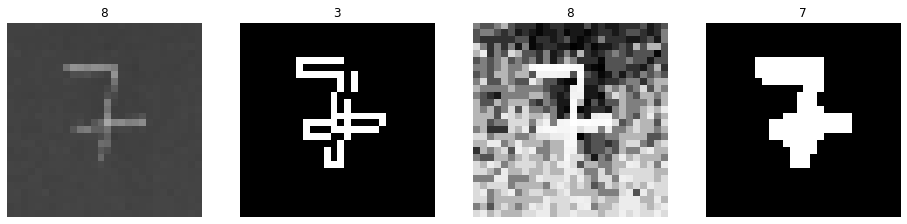

In [51]:
predicted_class = model.predict_classes(img.reshape((1,) + img.shape + (1,)))
edges_predicted_class = model.predict_classes(edges.reshape((1,) + edges.shape + (1,)))
enhanced_predicted_class = model.predict_classes(enhanced_img.reshape((1,) + enhanced_img.shape + (1,)))
bin_predicted_class = model.predict_classes(binimg.reshape((1,) + binimg.shape + (1,)))

plt.figure(figsize=(16,16))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.title(predicted_class[0])
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(edges, cmap='gray', vmin=0, vmax=1)
plt.title(edges_predicted_class[0])
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(enhanced_img, cmap='gray', vmin=0, vmax=1)
plt.title(enhanced_predicted_class[0])
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(binimg, cmap='gray', vmin=0, vmax=1)
plt.title(bin_predicted_class[0])
plt.axis('off')

plt.show()